In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore' )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [220]:
#Reading the data set
telecom= pd.read_csv('telecom_churn_data.csv')
telecom

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.00
99995,7000607688,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.00
99996,7000087541,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,229.187,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.00
99997,7000498689,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,322.991,...,0,1.0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0.00


In [221]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [222]:
telecom.nunique()

mobile_number     99999
circle_id             1
loc_og_t2o_mou        1
std_og_t2o_mou        1
loc_ic_t2o_mou        1
                  ...  
aon                3489
aug_vbc_3g        14676
jul_vbc_3g        14162
jun_vbc_3g        13312
sep_vbc_3g         3720
Length: 226, dtype: int64

In [223]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [224]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [225]:
#Handling missing values
telecom_missing_columns = (round(((telecom.isnull().sum()/len(telecom.index))*100),2).to_frame('null')).sort_values('null',ascending=False)
telecom_missing_columns

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [226]:
#list columns having more than 30%  missing values
col_list_missing_30 = list(telecom_missing_columns.index[telecom_missing_columns['null']>30])

#Delete columns having more than 30% missing values
telecom=telecom.drop(col_list_missing_30,axis=1)


In [227]:
telecom.shape

(99999, 186)

In [228]:
#Deleting columns not required
telecom=telecom.drop(['last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','circle_id'],axis=1)
telecom

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,0.0,0.0,0.0,6/30/2014,197.385,214.816,213.803,21.100,NaN,...,0,0,0,0,0,968,30.40,0.00,101.20,3.58
1,7001865778,0.0,0.0,0.0,6/30/2014,34.047,355.074,268.321,86.285,24.11,...,0,0,0,0,0,1006,0.00,0.00,0.00,0.00
2,7001625959,0.0,0.0,0.0,6/30/2014,167.690,189.058,210.226,290.714,11.54,...,0,0,0,0,0,1103,0.00,0.00,4.17,0.00
3,7001204172,0.0,0.0,0.0,6/30/2014,221.338,251.102,508.054,389.500,99.91,...,0,0,0,0,0,2491,0.00,0.00,0.00,0.00
4,7000142493,0.0,0.0,0.0,6/30/2014,261.636,309.876,238.174,163.426,50.31,...,0,0,0,0,0,1526,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,7001548952,0.0,0.0,0.0,6/30/2014,18.471,69.161,57.530,29.950,5.40,...,0,0,0,0,0,3199,0.00,0.00,0.00,0.00
99995,7000607688,0.0,0.0,0.0,6/30/2014,112.201,77.811,79.081,140.835,29.26,...,0,0,0,0,0,2052,0.00,0.00,0.00,0.00
99996,7000087541,0.0,0.0,0.0,6/30/2014,229.187,0.000,0.000,0.000,1.11,...,0,0,0,0,0,185,0.00,0.00,0.00,0.00
99997,7000498689,0.0,0.0,0.0,6/30/2014,322.991,303.386,606.817,731.010,0.00,...,4,1,0,0,0,478,1445.74,1151.03,1173.18,0.00


In [229]:
telecom.shape

(99999, 178)

In [230]:
#Filter high value customers
telecom['avg_rech_amt_6_7'] = (telecom['total_rech_amt_6']+telecom['total_rech_amt_7'])/2


In [231]:
X=telecom['avg_rech_amt_6_7'].quantile(0.7)

In [232]:
X

368.5

In [233]:
telecom=telecom[telecom['avg_rech_amt_6_7']>=X]
telecom.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,6/30/2014,1069.180,1349.850,3171.480,500.000,57.84,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,6/30/2014,378.721,492.223,137.362,166.787,413.69,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,0.0,0.0,0.0,6/30/2014,492.846,205.671,593.260,322.732,501.76,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,0.0,0.0,0.0,6/30/2014,430.975,299.869,187.894,206.490,50.51,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,0.0,0.0,0.0,6/30/2014,690.008,18.980,25.499,257.583,1185.91,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


In [234]:
telecom.shape

(30011, 179)

In [235]:
#we have around 30kk rows after filtering


In [236]:
telecom['churn'] = np.where((telecom['total_ic_mou_9']==0) & (telecom['total_og_mou_9']==0) & (telecom['vol_2g_mb_9']==0) & (telecom['vol_3g_mb_9']==0),1,0)

In [237]:
telecom.head

<bound method NDFrame.head of        mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7         7000701601             0.0             0.0             0.0   
8         7001524846             0.0             0.0             0.0   
13        7002191713             0.0             0.0             0.0   
16        7000875565             0.0             0.0             0.0   
17        7000187447             0.0             0.0             0.0   
...              ...             ...             ...             ...   
99970     7001386760             0.0             0.0             0.0   
99974     7001453306             0.0             0.0             0.0   
99986     7001729035             0.0             0.0             0.0   
99988     7002111859             0.0             0.0             0.0   
99997     7000498689             0.0             0.0             0.0   

      last_date_of_month_6    arpu_6    arpu_7    arpu_8   arpu_9  \
7                6/30/2014  1069.180

In [238]:
telecom=telecom.drop(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9'],axis=1)

In [239]:
telecom

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
7,7000701601,0.0,0.0,0.0,6/30/2014,1069.180,1349.850,3171.480,57.84,54.68,...,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,0.0,0.0,0.0,6/30/2014,378.721,492.223,137.362,413.69,351.03,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,6/30/2014,492.846,205.671,593.260,501.76,108.39,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,0.0,0.0,0.0,6/30/2014,430.975,299.869,187.894,50.51,74.01,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,0.0,0.0,0.0,6/30/2014,690.008,18.980,25.499,1185.91,9.28,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,7001386760,0.0,0.0,0.0,6/30/2014,261.269,410.614,290.851,5.01,142.59,...,0,0,0,1022,0.00,0.00,0.00,0.0,392.0,0
99974,7001453306,0.0,0.0,0.0,6/30/2014,414.303,321.093,371.016,17.56,0.00,...,0,0,0,3054,0.00,0.00,0.00,0.0,465.0,0
99986,7001729035,0.0,0.0,0.0,6/30/2014,644.973,455.228,564.334,806.73,549.36,...,0,0,0,2696,497.45,598.67,604.08,0.0,848.5,0
99988,7002111859,0.0,0.0,0.0,6/30/2014,312.558,512.932,402.080,199.89,174.46,...,0,0,0,328,104.73,0.00,0.00,0.0,467.0,0


In [240]:
round(100*(telecom['churn'].mean()),2)

8.64

In [241]:
#outliers treatment
telecom['mobile_number']= telecom['mobile_number'].astype(object)
telecom['churn']=telecom['churn'].astype(object)

In [242]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 138 entries, mobile_number to churn
dtypes: float64(110), int64(25), object(3)
memory usage: 31.8+ MB


In [243]:
#EDA 
# Univariate anlysis


In [244]:
numeric_cols=telecom.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=135)


In [245]:
#removing outliers
for col in numeric_cols:
    q1=telecom[col].quantile(0.10)
    q3=telecom[col].quantile(0.90)
    iqr=q3-q1
    range_low=q1-1.5*iqr
    range_high=q3+1.5*iqr

In [246]:
data=telecom.loc[(telecom[col]>range_low)&(telecom[col]<range_high)]
data.shape


(29700, 138)

In [247]:
# new features
[total for total in data.columns.to_list() if 'total' in total]


['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

In [248]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
7,7000701601,0.0,0.0,0.0,6/30/2014,1069.180,1349.850,3171.480,57.84,54.68,...,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,0.0,0.0,0.0,6/30/2014,378.721,492.223,137.362,413.69,351.03,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,6/30/2014,492.846,205.671,593.260,501.76,108.39,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,0.0,0.0,0.0,6/30/2014,430.975,299.869,187.894,50.51,74.01,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,0.0,0.0,0.0,6/30/2014,690.008,18.980,25.499,1185.91,9.28,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0


In [249]:
#EDA
data['churn']=data['churn'].astype('int64')


In [250]:
#deriving new column 
#decrease_mou_action
data['total_mou_good']=(data['total_og_mou_6']+data['total_ic_mou_6'])

In [251]:
data['avg_mou_action']= (data['total_og_mou_7']+data['total_og_mou_8']+data['total_ic_mou_7']+data['total_ic_mou_8'])/2

In [252]:
data['diff_mou']=data['avg_mou_action']-data['total_mou_good']


In [253]:
data['decrease_mou_action']=np.where((data['diff_mou']<0),1,0)
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
7,7000701601,0.0,0.0,0.0,6/30/2014,1069.180,1349.850,3171.480,57.84,54.68,...,57.74,19.38,18.74,0.0,1185.0,1,1113.99,973.090,-140.900,1
8,7001524846,0.0,0.0,0.0,6/30/2014,378.721,492.223,137.362,413.69,351.03,...,21.03,910.65,122.16,0.0,519.0,0,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,6/30/2014,492.846,205.671,593.260,501.76,108.39,...,0.00,0.00,0.00,0.0,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,6/30/2014,430.975,299.869,187.894,50.51,74.01,...,0.00,2.45,21.89,0.0,459.0,0,711.67,597.705,-113.965,1
17,7000187447,0.0,0.0,0.0,6/30/2014,690.008,18.980,25.499,1185.91,9.28,...,0.00,0.00,0.00,0.0,408.0,0,1341.41,1.560,-1339.850,1


In [254]:
#EDA
data['churn']=data['churn'].astype('int64')


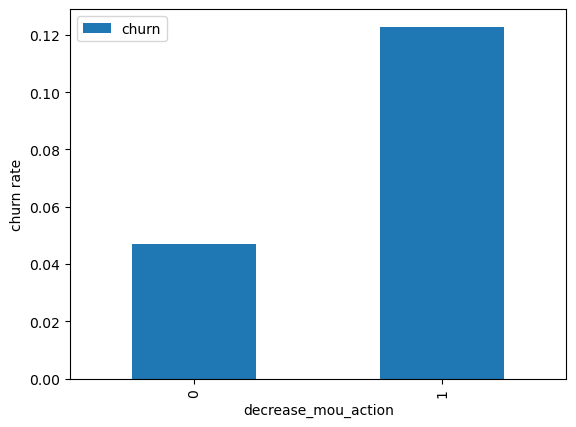

In [255]:
data.pivot_table(values='churn',index='decrease_mou_action',aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

In [256]:
#decrease_rech_amt_action
data['avg_rech_amt_action']=(data['total_rech_amt_7']+data['total_rech_amt_8'])/2


In [257]:
data['diff_rech_amt']= data['avg_rech_amt_action']-data['total_rech_amt_6']


In [258]:
data['decrease_rech_amt_action']=np.where((data['diff_rech_amt']<0),1,0)

In [259]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sep_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
7,7000701601,0.0,0.0,0.0,6/30/2014,1069.180,1349.850,3171.480,57.84,54.68,...,0.0,1185.0,1,1113.99,973.090,-140.900,1,2214.0,634.0,0
8,7001524846,0.0,0.0,0.0,6/30/2014,378.721,492.223,137.362,413.69,351.03,...,0.0,519.0,0,612.22,324.125,-288.095,1,360.5,-76.5,1
13,7002191713,0.0,0.0,0.0,6/30/2014,492.846,205.671,593.260,501.76,108.39,...,0.0,380.0,0,1875.70,1262.390,-613.310,1,485.0,-22.0,1
16,7000875565,0.0,0.0,0.0,6/30/2014,430.975,299.869,187.894,50.51,74.01,...,0.0,459.0,0,711.67,597.705,-113.965,1,254.0,-316.0,1
17,7000187447,0.0,0.0,0.0,6/30/2014,690.008,18.980,25.499,1185.91,9.28,...,0.0,408.0,0,1341.41,1.560,-1339.850,1,15.0,-801.0,1


In [260]:
data['churn']=data['churn'].astype('int64')

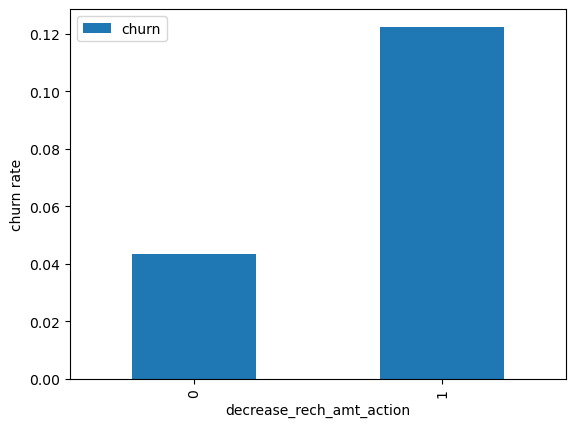

In [261]:
#EDA
data.pivot_table(values='churn',index='decrease_rech_amt_action',aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()



In [262]:
data['avg_arpu_action']=(data['arpu_7']+data['arpu_8'])/2

In [263]:
data['diff_arpu']=data['avg_arpu_action']-data['arpu_6']

In [264]:
data['decrease_arpu_action']=np.where(data['diff_arpu']<0,1,0)

In [265]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
7,7000701601,0.0,0.0,0.0,6/30/2014,1069.180,1349.850,3171.480,57.84,54.68,...,1113.99,973.090,-140.900,1,2214.0,634.0,0,2260.6650,1191.4850,0
8,7001524846,0.0,0.0,0.0,6/30/2014,378.721,492.223,137.362,413.69,351.03,...,612.22,324.125,-288.095,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,0.0,0.0,0.0,6/30/2014,492.846,205.671,593.260,501.76,108.39,...,1875.70,1262.390,-613.310,1,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,0.0,0.0,0.0,6/30/2014,430.975,299.869,187.894,50.51,74.01,...,711.67,597.705,-113.965,1,254.0,-316.0,1,243.8815,-187.0935,1
17,7000187447,0.0,0.0,0.0,6/30/2014,690.008,18.980,25.499,1185.91,9.28,...,1341.41,1.560,-1339.850,1,15.0,-801.0,1,22.2395,-667.7685,1


In [266]:
data['avg_vbc_3g_action']=(data['jul_vbc_3g']+data['aug_vbc_3g'])/2
data['diff_vbc']=data['avg_vbc_3g_action']-data['jun_vbc_3g']
data['decrease_vbc_action']=np.where(data['diff_vbc']<0,1,0)
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,decrease_mou_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
7,7000701601,0.0,0.0,0.0,6/30/2014,1069.180,1349.850,3171.480,57.84,54.68,...,1,2214.0,634.0,0,2260.6650,1191.4850,0,38.560,19.820,0
8,7001524846,0.0,0.0,0.0,6/30/2014,378.721,492.223,137.362,413.69,351.03,...,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,6/30/2014,492.846,205.671,593.260,501.76,108.39,...,1,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,6/30/2014,430.975,299.869,187.894,50.51,74.01,...,1,254.0,-316.0,1,243.8815,-187.0935,1,1.225,-20.665,1
17,7000187447,0.0,0.0,0.0,6/30/2014,690.008,18.980,25.499,1185.91,9.28,...,1,15.0,-801.0,1,22.2395,-667.7685,1,0.000,0.000,0


In [267]:
data['avg_rech_num_action']=(data['total_rech_num_7']+data['total_rech_num_8'])/2
data['diff_rech_num']=data['avg_rech_num_action']-data['total_rech_num_6']
data['decrease_rech_num_action']= np.where((data['diff_rech_num']<0),1,0)
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
7,7000701601,0.0,0.0,0.0,6/30/2014,1069.180,1349.850,3171.480,57.84,54.68,...,0,2260.6650,1191.4850,0,38.560,19.820,0,6.0,1.0,0
8,7001524846,0.0,0.0,0.0,6/30/2014,378.721,492.223,137.362,413.69,351.03,...,1,314.7925,-63.9285,1,465.840,343.680,0,17.5,-1.5,1
13,7002191713,0.0,0.0,0.0,6/30/2014,492.846,205.671,593.260,501.76,108.39,...,1,399.4655,-93.3805,1,0.000,0.000,0,7.5,1.5,0
16,7000875565,0.0,0.0,0.0,6/30/2014,430.975,299.869,187.894,50.51,74.01,...,1,243.8815,-187.0935,1,1.225,-20.665,1,4.0,-6.0,1
17,7000187447,0.0,0.0,0.0,6/30/2014,690.008,18.980,25.499,1185.91,9.28,...,1,22.2395,-667.7685,1,0.000,0.000,0,3.0,-16.0,1


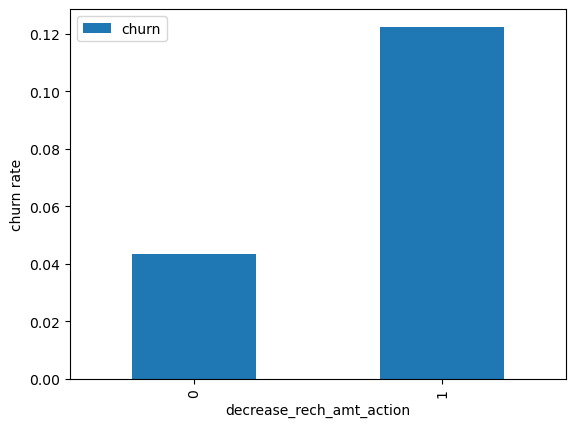

In [268]:
#EDA
data.pivot_table(values='churn',index='decrease_rech_amt_action',aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()


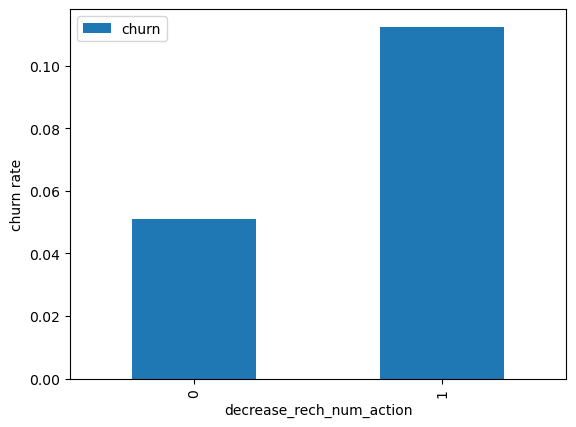

In [269]:
data.pivot_table(values='churn',index='decrease_rech_num_action',aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()


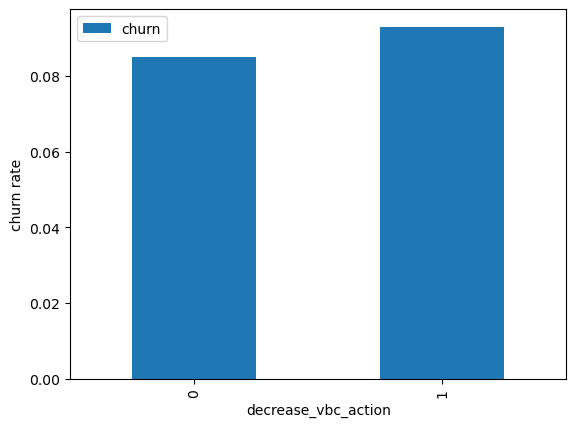

In [270]:
data.pivot_table(values='churn',index='decrease_vbc_action',aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()


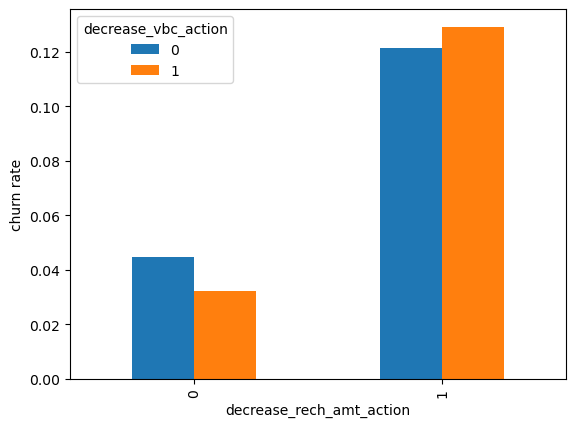

In [279]:
data.pivot_table(values='churn',index='decrease_rech_amt_action',columns='decrease_vbc_action',aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()


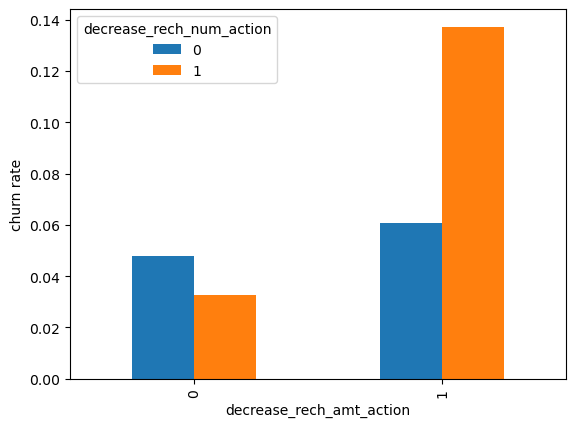

In [280]:
data.pivot_table(values='churn',index='decrease_rech_amt_action',columns='decrease_rech_num_action',aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()


In [271]:
data=data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_amt_action',
                 'diff_rech_amt','avg_rech_amt_6_7'],axis=1)

In [272]:
data.shape

(29700, 148)

In [273]:
#Train-test split
from sklearn.model_selection import train_test_split


In [274]:
X=data.drop(['mobile_number','churn'],axis=1)

In [275]:
y=data['churn']

In [340]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [342]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [335]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [336]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [337]:
folds = KFold(n_splits=5, shuffle=True, random_state=4)
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 
